# **Corpus Acquisition: National Science Foundation data**
---




Date: Mar 08, 2021

Author: Jerónimo Arenas-García (jeronimo.arenas@uc3m.es)

Version 1.0

In [ ]:
# Common imports 

import numpy as np
import pandas as pd
import zipfile as zp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

#For fancy table Display
%load_ext google.colab.data_table

## 1. Project Objectives


---

In this notebook we are going to develop a project that will incorporate the most relevant elements of natural language processing that we will study in the subject.

The objective is to analyze the main themes of a corpus of documents, as well as the structure of the data corpus itself using different visualizations to facilitate the design and adjustment of the tools used in the process.

The following figure summarizes the steps and  libraries that we will follow during this project.

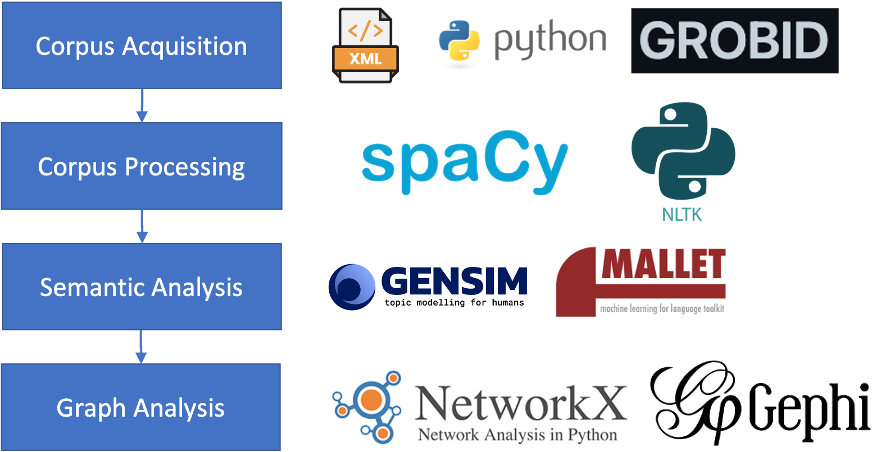

   - ***Corpus Acquisition***: We will ingest a collection of documents for further processing in python. Import techniques will differ based on the kind of documents we need to work with, and their original format (i.e., PDF, XML, etc). It some cases, we will need to use crawling techniques.

   - ***Corpus Processing***: Here, we will work with unstructured text, i.e., the original text as it was written by a person. In its original format, the data cannot be efficiently used by most machine learning algorithms, so it is necessary to apply a series of transformation to make data usable and fit the characteristics of machine learning algorithms. 

   - ***Semantic Analysis***: We will rely on Topic Modeling and, in particular, Latent Dirichlet Allocation, to find out the leading topics in the dataset as well as the main topics of each document.

   - ***Graph Analysis***: Finally, a graph will be calculated based on the semantic characterization of all documents. Some relevant statistics of the graph will be calculated, and relevant documents will be identified from this perspective. For graph visualization we will rely on a external application (gephi) that offers interactivity and better scalability properties.

After completing the project, students will have acquired the following skills:

   - Ability to work with different sources of textual data

   - Knowledge of the most used text preprocessing steps for learning topics

   - Ability to handle different topic modeling tools, knowing which are the hyperparameters that must be adjusted, and the statistics that can facilitate their adjustment

   - Greater skill in analyzing the results of machine learning algorithms

   - Knowledge of visualization techniques commonly used in topic and graph modeling

   - Knowledge of some of the *state of the art* libraries for natural language processing in python

## 2. Corpus acquisition
---

We will work with a collection of research projects funded by the US *National Science Foundation (NSF)*. NSF funds fundamental research projects in all disciplines. The summary and some metadata of all awarded projects can be downloaded from the [NSF Open Data website](https://www.nsf.gov/awardsearch/download.jsp).

Some of these datasets have already been downloaded for this session, spanning a three year period. Note you can work with any other years or expand the time span.

   - [Zip file with data from 2019](http://www.tsc.uc3m.es/~jarenas/NSFdata/2019.zip)
   - [Zip file with data from 2018](http://www.tsc.uc3m.es/~jarenas/NSFdata/2018.zip)
   - [Zip file with data from 2017](http://www.tsc.uc3m.es/~jarenas/NSFdata/2017.zip)
   - [Sample XML file: 1600057.xml](http://www.tsc.uc3m.es/~jarenas/NSFdata/1600057.xml)

You could download these data files now, or load them using the provided links using a python library for retrieving data from the web, e.g., in this notebook we will use the module `requests`.

(*As a side note, there are many other available text collections to work with. In particular, the NLTK library has many examples, that you can explore using the `nltk.download()` tool*.

    import nltk
    nltk.download()

*for instance, you can take the gutemberg dataset*

    Mycorpus = nltk.corpus.gutenberg
    text_name = Mycorpus.fileids()[0]
    raw = Mycorpus.raw(text_name)
    Words = Mycorpus.words(text_name)

*Other Python modules like Gensim or Sci-kit learn include also text databases to work with*).


### 2.1. Exploring file structure

NSF project information is provided in XML files. Projects are yearly grouped in `.zip` files, and each project is saved in a different XML file. To explore the structure of such files, we will use the file `1600057.xml`. Parsing XML files in python is rather easy using the native `xml` module that provides class `ElementTree`. 

Other libraries that you could use are [`lxml`](https://lxml.de/) and the very powerful[`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

To introduce some of the most important features for working with XML files we will follow the <a href=http://docs.python.org/3.4/library/xml.etree.elementtree.html#module-xml.etree.ElementTree>tutorial</a> that comes with the documentation of the library.

#### 2.1.1. File format

To start with, you can have a look at the contents of the example file. We are interested in the following information of each project:

   * Project identifier
   * Project Title
   * Project Abstract
   * Budget
   * Starting Year (we will ignore project duration)
   * Institution (name, zipcode, and state)

Take a look at the printed file and locate the information enumerated in the list.**bold text**

In [ ]:
## Read files from web. You can comment this block if you are reading files
## from your local drive
import requests
from io import BytesIO #Useful for presenting data as a byte stream

url_base = 'http://www.tsc.uc3m.es/~jarenas/NSFdata/'
web_read = True

if web_read:
    project_url = url_base + '1600057.xml'
    project_xml = requests.get(project_url).text
else:
    pass #Implement here function to read XML file

print(project_xml)

<?xml version="1.0" encoding="UTF-8"?>
<rootTag>
<Award>
<AwardTitle>Novel States in Spin-Orbit-Coupled and Correlated Materials</AwardTitle>
<AwardEffectiveDate>08/01/2016</AwardEffectiveDate>
<AwardExpirationDate>12/31/2016</AwardExpirationDate>
<AwardAmount>306810</AwardAmount>
<AwardInstrument>
<Value>Continuing grant</Value>
</AwardInstrument>
<Organization>
<Code>03070000</Code>
<Directorate>
<LongName>Direct For Mathematical &amp; Physical Scien</LongName>
</Directorate>
<Division>
<LongName>Division Of Materials Research</LongName>
</Division>
</Organization>
<ProgramOfficer>
<SignBlockName>Tomasz Durakiewicz</SignBlockName>
</ProgramOfficer>
<AbstractNarration>Non-technical Abstract:&lt;br/&gt;Modern condensed matter physics research has produced novel materials with fundamental properties that underpin a remarkable number of cutting-edge technologies. It is now generally accepted that novel materials are necessary for critical advances in technologies and whoever discovers no

**Exercise 1:** Using standard string processing functions, implement a function to extract from the previous string the following elements:

   - The project abstract
   - The project identifier

In [ ]:
def proj_abstr_id(xmlstring):
    #<SOL>
    # Your solution goes here
    abstract = #
    prj_id = xmlstring.split('<AwardID>')[1].split('</AwardID>')[0]
    #</SOL>
    return abstract, prj_id

abstract, prj_id = proj_abstr_id(project_xml)
print('Project Identifier:', prj_id)
print('This is the abstract:', abstract)

#### 2.1.2. Parsing the XML file

XML is an inherently hierarchical data format, and the most natural way to represent it is with a tree. The `ElementTree` module has two classes for this purpose:

   * `ElementTree` represents the whole XML document as a tree
   * `Element` represents a single node in this tree

We can parse the XML structure directly from a string, or by reading an XML file


In [ ]:
import xml.etree.ElementTree as ET

root = ET.fromstring(project_xml)

# Use the following fragment if you want to read data from a local file
# tree = ET.parse(xmlfile)
# root = tree.getroot

`fromstring()` parses XML from a string directly into an `Element`, which is the root element of the parsed tree. Other parsing functions may create an `ElementTree`, but we will not cover them here.

As an `Element`, root has a tag and a dictionary of attributes:


In [ ]:
print(root.tag)
print(root.attrib)

rootTag
{}


It also has children nodes over which we can iterate:

In [ ]:
for child in root:
    print(child.tag, child.attrib)

Award {}


Children are nested, and we can access specific child nodes by index. We can also access the text of specified elements. For instance:

In [ ]:
all_elements = []
for child in root[0]:
    n_children = len(child)
    all_elements.append([child.tag, child.attrib, child.text, n_children])

elements_df = pd.DataFrame(all_elements, columns=['Tag', 'Attributes', 'Content', '#Children'])
elements_df

,Tag,Attributes,Content,#Children
0,AwardTitle,{},Novel States in Spin-Orbit-Coupled and Correla...,0
1,AwardEffectiveDate,{},08/01/2016,0
2,AwardExpirationDate,{},12/31/2016,0
3,AwardAmount,{},306810,0
4,AwardInstrument,{},\n,1
5,Organization,{},\n,3
6,ProgramOfficer,{},\n,1
7,AbstractNarration,{},Non-technical Abstract:<br/>Modern condensed m...,0
8,MinAmdLetterDate,{},08/05/2016,0
9,MaxAmdLetterDate,{},08/05/2016,0


Have a look at the table, and try to understand why some elements of the tree have empty content and why some have no children at all whereas other can have many children.

*(By the way, note that creating a dataframe is an easy way to display lists of lists or lists of tuples in fancy manner.)*

The presented classes and functions are all you need to solve the following exercise. However, there are many other interesting functions that can probably make it easier for you to work with XML files. For more information, please refer to the ElementTree API.

#### 2.1.3. Parsing the XML project files

**Exercise 2**: Implement a function that parses an XML string and provides as its output a dictionary with fields:

    project_code      (string)
    title             (string)
    abstract          (string)
    budget            (float)
    year              (string)
    institution       (tuple with elements: name, zipcode, and statecode)


In [ ]:
def parse_xmlproject(xml_string):
    """This function processess the specified XML field,
    and outputs a dictionary with the desired project information
    
    :xml_string: String with XML content
    :Returns: Dictionary with indicated files
    """
    
    #<SOL>
    root = ET.fromstring(xml_string)
    dictio = {}
    
    for child in root[0]:
        if child.tag.lower() == 'awardtitle':
            dictio['title'] = child.text
        elif child.tag.lower() == 'awardeffectivedate':
            dictio['year'] = str(child.text[-4:])
        elif child.tag.lower() == 'awardamount':
            dictio['budget'] = float(child.text)
        elif child.tag.lower() == 'abstractnarration':
            dictio['abstract'] = child.text
        elif child.tag.lower() == 'awardid':
            dictio['project_code'] = child.text
        elif child.tag.lower() == 'institution':
            #For the institution we have to access the children elements
            #and search for the name, zipcode, and statecode only
            name = ''
            zipcode = ''
            statecode = ''
            for child2 in child:
                if child2.tag.lower() == 'name':
                    name = child2.text
                elif child2.tag.lower() == 'zipcode':
                    zipcode = child2.text
                elif child2.tag.lower() == 'statecode':
                    statecode = child2.text
            dictio['institution'] = (name, zipcode, statecode)
    
    return dictio
    #</SOL>

#Test the function and print the result
parse_xmlproject(project_xml)

{'abstract': 'Non-technical Abstract:<br/>Modern condensed matter physics research has produced novel materials with fundamental properties that underpin a remarkable number of cutting-edge technologies. It is now generally accepted that novel materials are necessary for critical advances in technologies and whoever discovers novel materials generally controls the science and technology of the future. Transition metal oxides have attracted enormous interest within both the basic and applied science communities.  However, for many decades, the overwhelming balance of effort was focused on the 3d-elements (such as iron, copper, etc.) and their compounds; the heavier 4d- and 5d-elements (such as ruthenium, iridium, etc., which constitute two thirds of the d-elements listed in the Periodic Table) and their compounds have been largely ignored until recently. The principal investigator seeks to discover novel materials containing 4d- and/or 5d-elements and understand how they offer wide-rang

### 2.2. Building the dataset

Now, we will use the function you just implemented, to create a database that we will use throughout the project.

For simplicity, in this section we will simply store the dataset as a list containing the dictionaries associated to each of the considered projects in a time interval.

In [ ]:
# Construct an iterator (or a list) for the years you want to work with
years = [2017, 2018, 2019]
NSF_data = []

for year in years:
    print('\nDownloading file for year', year, '...')
    if web_read:
        url = url_base + str(year) + '.zip'
        binary_file = BytesIO(requests.get(url).content)
        zpobj = zp.ZipFile(binary_file)
    else:
        pass #Read zpobj directly from local file

    for count, fileinzip in enumerate(zpobj.namelist()):
        if not count%1000:
            print('\rProcessing file', str(count), end='')
        if fileinzip.endswith('xml'):
            #Some files seem to be incorrectly parsed
            try:
                project_dictio = parse_xmlproject(zpobj.read(fileinzip))
                if project_dictio['abstract']: #We keep only the projects with abstract
                    NSF_data.append(project_dictio)
            except:
                pass




Processing file 12200
Processing file 12200
Processing file 12900

We will extract some characteristics of the constructed dataset:

Number of projects in dataset: 37153
Average budget of projects in dataset (USD): 478966.6126019433
Number of unique institutions in dataset: 3230


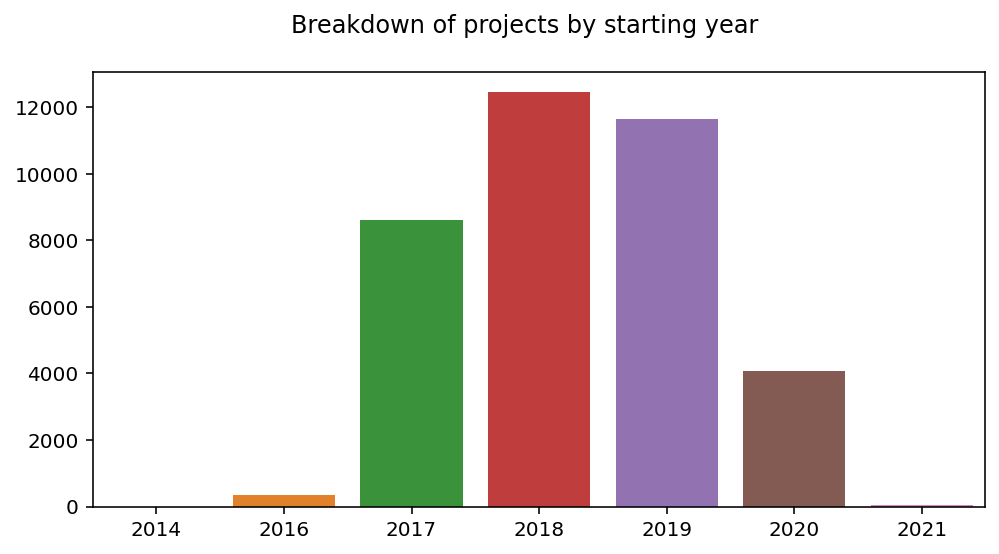

In [ ]:
print('Number of projects in dataset:', len(NSF_data))

####
budget_data = list(map(lambda x: x['budget'], NSF_data))
print('Average budget of projects in dataset (USD):', np.mean(budget_data))

####
insti_data = list(map(lambda x: x['institution'] if 'institution' in x else None, NSF_data))
print('Number of unique institutions in dataset:', len(set(insti_data)))

#### Breakdown of projects by starting year
counts = dict()
for project in NSF_data:
    counts[project['year']] = counts.get(project['year'],0) + 1

keys = list(counts.keys())
# get values in the same order as keys, and parse percentage values
vals = [counts[k] for k in keys]
keys = [int(k) for k in keys]
fig, axes = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
fig.suptitle('Breakdown of projects by starting year')
sns.barplot(ax = axes, x=keys, y=vals)
plt.show()

**Exercise 3:** In the previous code cell we obtained the histogram iterating over all projects, which is very inefficient for long lists. Rewrite a more efficient implementation using the `Counter` class provided by `collections` library.

In [ ]:
from collections import Counter

#<SOL>
all_y = [project['year'] project in NSF_data]
hist_values = Counter(all_y)
#</SOL>

**Exercise 4:** Compute the average length of the abstracts of all projects in the dataset

In [ ]:
#<SOL>
abstractlen_data = list(map(lambda x: len(x['abstract']), NSF_data))
print('Average length of projects abstracts (in characters):', np.mean(abstractlen_data))
#</SOL>

Average length of projects abstracts (in characters): 2826.0681237046806


### **2.3 Extension exercise**

In many cases creating the dataset can be significantly more involved than the case we have just studied, especially when the task involves web crawling.

In this exercise, students are suggested to create an additional dataset with text extracted from scientific papers available from the *Association of Computational Linguistics (ACL)*. The collection is known as the [ACL Anthology](https://www.aclweb.org/anthology/).

To create a dataset follow these steps:

1. Visit [ACL Anthology](https://www.aclweb.org/anthology/), and explore the structure of the web. Follow the links to check which metadata are available for each paper.
2. Download the [bulk data with abstract information](https://www.aclweb.org/anthology/anthology+abstracts.bib.gz).
3. Process the dowloaded file to obtain dataset that keeps at least the following fields: abstract, year, venue, and authors.
4. If you want to extract even more information, note that the full paper can easily be obtained for most publications as a pdf file. Figure out how to extract the text from pdf files using any of the available python libraries. For scientific literature, a particularly good match is [Grobid](https://github.com/kermitt2/grobid). [Grobid](https://github.com/kermitt2/grobid) incorporates neural networks intelligence to extract from the pdf file some metadata commonly available for scientific papers.

**Discussion**: Propose strategies to create a subset of the ACL Anthology that includes just the papers (co)-authored by researchers affiliated to a Spanish institution.


